# Bank Customer Churn

## 1. Dataset Review

In [280]:
# For data wrangling
import pandas as pd  
import numpy as np  

# For data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [281]:
# Read dataframe
customer_data = pd.read_csv('D:\Python(New)\Project\Bank_Customer_Churn_Prediction\data\Churn_Modelling.csv', delimiter=',')

In [282]:
customer_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [283]:
# Check columns list and missing values
customer_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [284]:
# Get unique count for each variable
customer_data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Based on the information provided, we can omit the initial two attributes since they pertain to an individual customer and are not necessary for our purposes. Additionally, we should also exclude the surname attribute due to the potential implications of profiling.

In [285]:
# Drop the columns as explained above
customer_data = customer_data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [286]:
# Review the top rows after dropping the variables
customer_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Hypothesis questions:

1. The available data seems to capture a specific moment in time, as indicated by attributes like the balance associated with a given date. However, this raises several inquiries:
        . What date is it and of what relevance is this date?
        . Would it be possible to obtain balances over a period of time as opposed to a single date?
2. There are customers who have exited but still have a balance. What is the reason for this? Could they have exited  from a product and not the bank?
3. What does being an active member mean and are there difference degree to it? Could it be better to provide transaction count both in terms of credits and debits to the account instead?
4. A break down to the products bought into by a customer could provide more inforamtion topping listing of product count

In [287]:
# Check variable data types
customer_data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## 2. Exploratory Data Analysis(EDA)

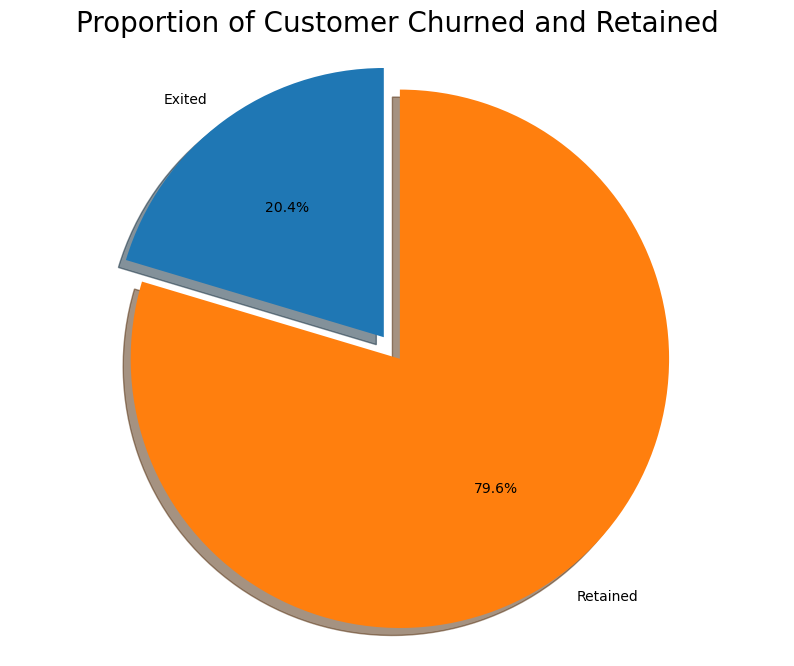

In [288]:
label = 'Exited', 'Retained'
sizes = [customer_data.Exited[customer_data['Exited']==1].count(), customer_data.Exited[customer_data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Customer Churned and Retained", size = 20)
plt.show()

Approximately 20% of the customer base has churned, meaning they have discontinued their relationship with the bank. As a baseline model, it would be reasonable to predict that 20% of the customers will churn. Since this percentage represents a relatively small portion of the total customer base, it is crucial to select a model that can accurately identify this 20% with high precision. The bank's primary focus is on identifying and retaining this particular group of customers rather than accurately predicting the customers who remain with the bank.

<Axes: xlabel='IsActiveMember', ylabel='count'>

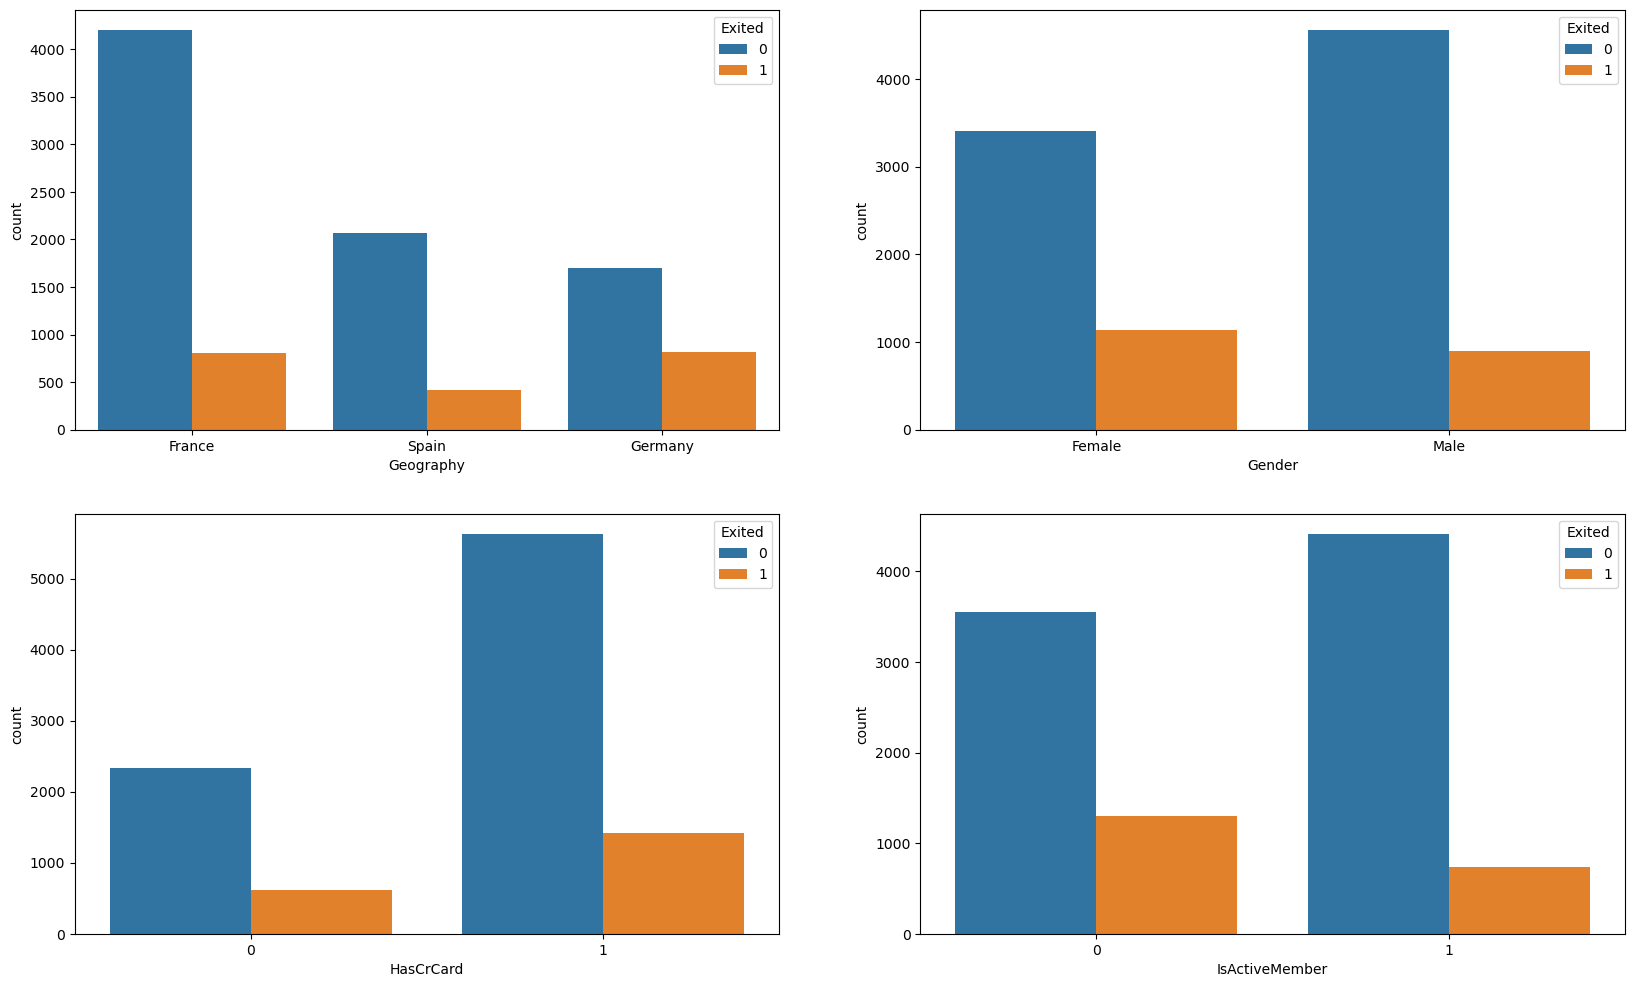

In [289]:
# Review the "Status" relation with categorical variables
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(data=customer_data, x='Geography', hue='Exited', ax=ax[0][0])
sns.countplot(data=customer_data, x='Gender', hue='Exited', ax=ax[0][1])
sns.countplot(data=customer_data, x='HasCrCard', hue='Exited', ax=ax[1][0])
sns.countplot(data=customer_data, x='IsActiveMember', hue='Exited', ax=ax[1][1])

Based on the information provided, we have observed the following:

1. The majority of the customers who churned are from France. However, there is an inverse relationship between the proportion of churned customers and the population of customers in certain areas. This suggests that the bank may have a problem in regions with fewer clients, possibly due to inadequate customer service resources allocated.

2. Female customers have a higher proportion of churn compared to male customers

3. There is a significant number of customers who churned have credit cards. It is worth noting that a large majority of the overall customer base also possesses credit cards, so this correlation may be coincidental.

4. The proportion of churned customers is higher among inactive members. This raises concerns as the overall proportion of inactive members is already quite substantial. Implementing a program to convert these inactive customers into active ones could greatly reduce churn and have a positive impact on customer retention.

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

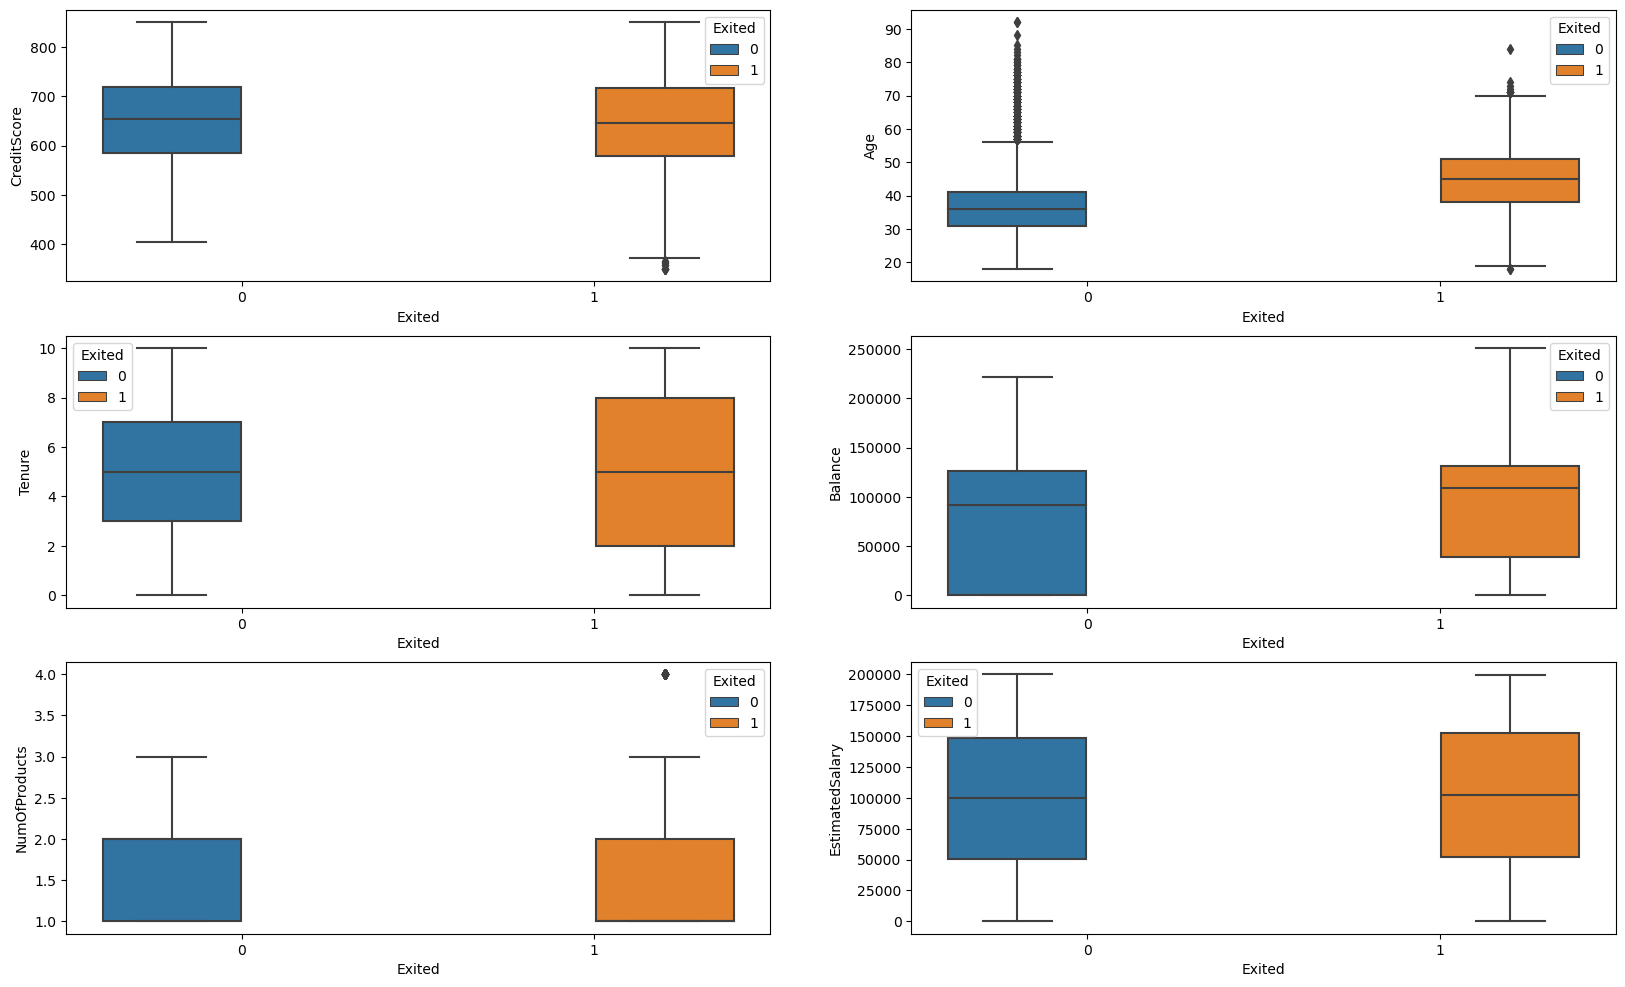

In [290]:
# Relations based on countinuous data attributes

fig, ax = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(data = customer_data, x = 'Exited', y = 'CreditScore', hue = 'Exited', ax = ax[0][0])
sns.boxplot(data = customer_data, x = 'Exited', y = 'Age', hue = 'Exited', ax = ax[0][1])
sns.boxplot(data = customer_data, x = 'Exited', y = 'Tenure', hue = 'Exited', ax = ax[1][0])
sns.boxplot(data = customer_data, x = 'Exited', y = 'Balance', hue = 'Exited', ax = ax[1][1])
sns.boxplot(data = customer_data, x = 'Exited', y = 'NumOfProducts', hue = 'Exited', ax = ax[2][0])
sns.boxplot(data = customer_data, x = 'Exited', y = 'EstimatedSalary', hue = 'Exited', ax = ax[2][1])

We have observed the following:

1. There is no significant variation in the distribution of credit scores between customers who have stayed with the bank and those who have churned.

2. Older customers are more likely to churn compared to younger customers, suggesting a possible difference in service preferences across age groups. The bank may need to reassess its target market or review retention strategies tailored to different age categories.

3. Customers at the extremes of tenure (either very short or very long) are more likely to churn compared to those with an average tenure.

4. Concerningly, the bank is losing customers with substantial bank balances, which could impact their available capital for lending.

5. Neither the product nor the salary has a significant impact on the likelihood of customer churn.

## 3. Feature Engineering

In [291]:
# Split train and test data
df_train = customer_data.sample(frac=0.8, random_state=200)
df_test = customer_data.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


(-1.0, 5.0)

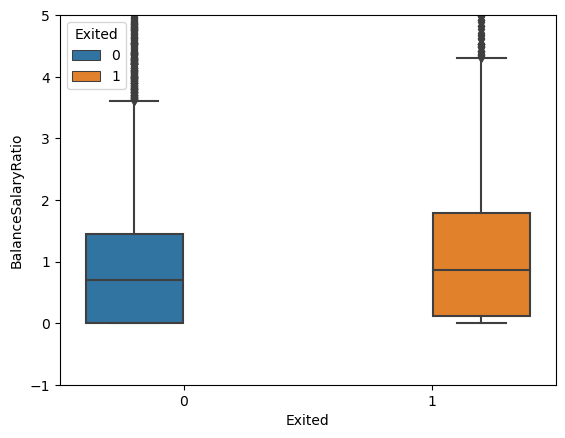

In [292]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(data = df_train, x = 'Exited', y = 'BalanceSalaryRatio', hue = 'Exited')
plt.ylim(-1, 5)

Based on our findings, the salary of a customer has minimal influence on the likelihood of churn. However, when examining the ratio of bank balance to estimated salary, we observe that customers with a higher balance-to-salary ratio are more prone to churn. This is a concerning trend for the bank, as it affects their source of loan capital.

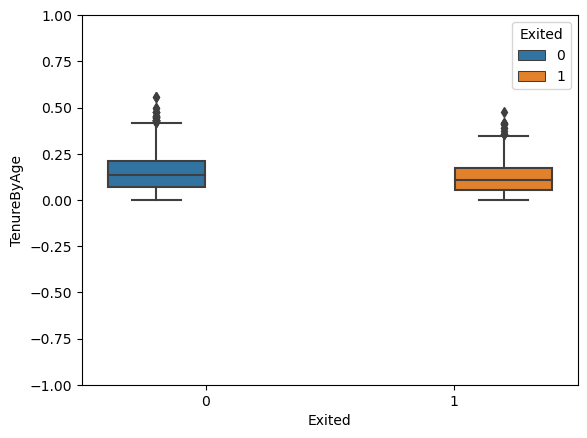

In [293]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:

df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(data = df_train, x = 'Exited', y = 'TenureByAge', hue = 'Exited')
plt.ylim(-1, 1)
plt.show()

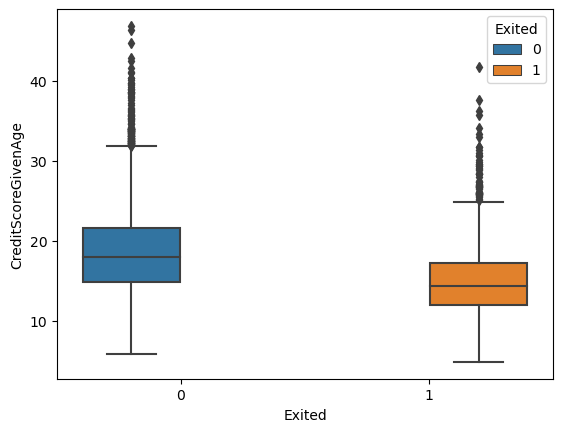

In [294]:
# Variable to capture credit score given age to take into account credit behaviour vs adult life

df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)
sns.boxplot(data = df_train, x = 'Exited', y = 'CreditScoreGivenAge', hue = 'Exited')
plt.show()

In [295]:
# Resulting Data Frame

df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


## 4. Data Prep For Model Fitting

In [296]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore','Age', 'Tenure','Balance', 'NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio', 'TenureByAge', 'CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender']
df_train = df_train[['Exited'] + continuous_vars + cat_vars]
df_train.head()


,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male


In [297]:
# change 0 to -1 so that the models can capture a negative relation where the attribute in inapplicable instead of 0 for one hot variables
df_train.loc[df_train.HasCrCard == 0, 'HasCrCard'] = -1
df_train.loc[df_train.IsActiveMember == 0, 'IsActiveMember'] = -1
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,France,Male


In [298]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df_train[i].dtype == str or df_train[i].dtype == object):
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j, 1, -1)
        remove.append(i) 
df_train = df_train.drop(remove, axis = 1)
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,1,-1,-1,1,-1
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,-1,1,-1,1,-1
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,-1,1,-1,1,-1
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,-1,-1,1,-1,1
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,-1,1,-1,-1,1


In [299]:
# MinMax scaling the continuous variables
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()
df_train[continuous_vars]= (df_train[continuous_vars]-minVec)/(maxVec - minVec)
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,1,-1,-1,1,-1
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,-1,1,-1,1,-1
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,-1,1,-1,1,-1
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,-1,-1,1,-1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,-1,1,-1,-1,1


In [300]:
# data prep pipeline for test data

def PrepPipeLine(df_predict, df_train_Cols, minVec, maxVec):
    # Make a copy of the DataFrame to avoid modifying the original data
    df_predict = df_predict.copy()
    # Add new features
    df_predict['BalanceSalaryRatio'] = df_predict['Balance'] / df_predict['EstimatedSalary']
    df_predict['TenureByAge'] = df_predict['Tenure'] / df_predict['Age']
    df_predict['CreditScoreGivenAge'] = df_predict['CreditScore'] / df_predict['Age']
    
    # Reorder the columns
    continuous_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary',
                       'BalanceSalaryRatio', 'TenureByAge', 'CreditScoreGivenAge']
    cat_vars = ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender']
    df_predict = df_predict[['Exited'] + continuous_vars + cat_vars]
    
    # Change 0 to -1 in categorical variables
    df_predict.loc[df_predict['HasCrCard'] == 0, 'HasCrCard'] = -1
    df_predict.loc[df_predict['IsActiveMember'] == 0, 'IsActiveMember'] = -1
    
    # One-hot encode the categorical variables
    for i in cat_vars:
        for j in df_predict[i].unique():
            column_name = i + '_' + str(j)
            df_predict[i + '_' + str(j)] = np.where(df_predict[i] == j, 1, -1)
    
    # Ensure all one-hot encoded variables from training data appear in the test data
    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1
    
    # MinMax scaling the continuous variables based on min and max from the training data
    df_predict[continuous_vars] = (df_predict[continuous_vars] - minVec) / (maxVec - minVec)
    
    # Ensure that the variables are ordered in the same way as in the training set
    df_predict = df_predict[df_train_Cols]
    
    return df_predict

## 5. Model Fitting and Selection

In [301]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [302]:
# Function to give best model score and parameters

def best_model(model):
    print(model.best_score_)
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method, method2):
    auc_score = roc_auc_score(y_actual, method)
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2)
    return (auc_score, fpr_df, tpr_df)

In [303]:
# Fit primal logistic regression model
param_grid = {
    'C': [0.1,0.5,1,10,50,100],
    'max_iter': [250],
    'fit_intercept':[True],
    'intercept_scaling':[1],
    'penalty':['l2'],
    'tol':[0.00001,0.0001,0.000001]
}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(df_train.loc[:, df_train.columns != 'Exited'], df_train['Exited'])

best_model(log_primal_Grid)

0.8149999999999998
{'C': 100, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=100, max_iter=250, tol=1e-05)


In [304]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid = {
    'C': [0.1,10,50],
    'max_iter': [300,500],
    'fit_intercept':[True],
    'intercept_scaling':[1],
    'penalty':['l2'],
    'tol':[0.00001,0.0001,0.000001]
}
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Exited'])
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(df_train_pol2,df_train['Exited'])

best_model(log_pol2_Grid)

0.8554999999999999
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=50, max_iter=300, solver='liblinear')


In [305]:
# Fit SVM with RBF kernel
param_grid = {
    'C': [0.5,100,150],
    'gamma': [0.1,0.01,0.001],
    'probability': [True],
    'kernel': ['rbf']
}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=5, refit=True, verbose=0)
SVM_grid.fit(df_train.loc[:,df_train.columns != 'Exited'], df_train['Exited'])
best_model(SVM_grid)

0.8526250000000001
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=100, gamma=0.1, probability=True)


In [306]:
# Fit SVM with pol kernel
param_grid = {
    'C': [0.5,1,10,50,100],
    'gamma': [0.1,0.01,0.001],
    'degree':[2,3,4],
    'probability': [True],
    'kernel': ['poly'],
    'degree': [2,3]
}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=5, refit=True, verbose=0)
SVM_grid.fit(df_train.loc[:,df_train.columns != 'Exited'], df_train['Exited'])

best_model(SVM_grid)

0.8560000000000001
{'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)


In [307]:
# Fit Random Forest Classifier
param_grid = {
    'max_depth': [3, 5, 6 ,7, 8],
    'max_features': [2, 4, 6, 7, 8, 9],
    'n_estimators': [10, 50, 100, 200],
    'min_samples_split': [3, 5, 7, 9]
}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(df_train.loc[:,df_train.columns != 'Exited'], df_train['Exited'])

best_model(RanFor_grid)

0.8636249999999999
{'max_depth': 8, 'max_features': 6, 'min_samples_split': 9, 'n_estimators': 50}
RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=9,
                       n_estimators=50)


In [308]:
# Fit Extreme Gradient Boosting Classifier
param_grid = {
    'max_depth': [5, 6, 7, 8],
    'gamma': [0.01, 0.001, 0.001],
    'min_child_weight': [1, 5, 10],
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'n_estimators': [5, 10, 20, 100]
}

xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(df_train.loc[:, df_train.columns != 'Exited'], df_train['Exited'])

best_model(xgb_grid)


0.8629999999999999
{'gamma': 0.001, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 5}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.001, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=5, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


### Fit Best Models

In [309]:
# Fit primal logistic regression
log_primal = LogisticRegression(
    C=100, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1,
    max_iter=250, multi_class='auto', n_jobs=None, penalty='l2', random_state=None,
    solver='lbfgs', tol=1e-05, verbose=0, warm_start=False
)

log_primal.fit(df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited)

LogisticRegression(C=100, max_iter=250, tol=1e-05)

In [310]:
# Fit logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Exited'])
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='auto', n_jobs=None, 
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(df_train_pol2,df_train.Exited)

LogisticRegression(C=10, max_iter=300, solver='liblinear')

In [311]:
# Fit SVM with RBF Kernel
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

SVC(C=100, gamma=0.1, probability=True)

In [312]:
# Fit SVM with pol kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)

In [313]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, 
                            max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_samples_leaf=1, min_samples_split=3,
                            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=3,
                       n_estimators=50)

In [314]:
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5,
                    booster='gbtree',
                    colsample_bylevel=1,
                    colsample_bytree=1,
                    gamma=0.01,
                    learning_rate=0.1,
                    max_delta_step=0,
                    max_depth=7,
                    min_child_weight=5,
                    missing=1,
                    n_estimators=20,
                    n_jobs=1,
                    nthread=None,
                    objective='binary:logistic',
                    random_state=0,
                    reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None, subsample=1, verbosity=1)
XGB.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.01, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=7, max_leaves=None, min_child_weight=5, missing=1,
              monotone_constraints=None, n_estimators=20, n_jobs=1,
              nthread=None, num_parallel_tree=None, predictor=None, ...)

### Review Best Model Fit Accuracy

In [315]:
# Primal logistic regression
print(classification_report(df_train.Exited, log_primal.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6353
           1       0.64      0.24      0.35      1647

    accuracy                           0.82      8000
   macro avg       0.73      0.60      0.62      8000
weighted avg       0.79      0.82      0.78      8000



In [316]:
# Logistic regression with pol 2 kernel
print(classification_report(df_train.Exited, log_pol2.predict(df_train_pol2)))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6353
           1       0.77      0.46      0.57      1647

    accuracy                           0.86      8000
   macro avg       0.82      0.71      0.75      8000
weighted avg       0.85      0.86      0.85      8000



In [317]:
# SVM with RBF kernel
print(classification_report(df_train.Exited, SVM_RBF.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6353
           1       0.85      0.40      0.54      1647

    accuracy                           0.86      8000
   macro avg       0.86      0.69      0.73      8000
weighted avg       0.86      0.86      0.84      8000



In [318]:
# SVM with pol kernel
print(classification_report(df_train.Exited, SVM_POL.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6353
           1       0.84      0.38      0.52      1647

    accuracy                           0.86      8000
   macro avg       0.85      0.68      0.72      8000
weighted avg       0.85      0.86      0.83      8000



In [319]:
# Random Forest Classifier
print(classification_report(df_train.Exited, RF.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6353
           1       0.88      0.53      0.66      1647

    accuracy                           0.89      8000
   macro avg       0.89      0.76      0.80      8000
weighted avg       0.89      0.89      0.88      8000



In [320]:
#fill missing values with mean column values
df_train= df_train.fillna(df_train.mean())

In [321]:
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,1,-1,-1,1,-1
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,-1,1,-1,1,-1
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,-1,1,-1,1,-1
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,-1,-1,1,-1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,-1,1,-1,-1,1


In [322]:
print(classification_report(df_train.Exited,  XGB.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6353
           1       0.83      0.53      0.65      1647

    accuracy                           0.88      8000
   macro avg       0.86      0.75      0.79      8000
weighted avg       0.88      0.88      0.87      8000



In [323]:
# Calculate AUC, FPR, and TPR for all models
y = df_train['Exited']
X = df_train.loc[:, df_train.columns != 'Exited']
X_pol2 = df_train_pol2
# Primal logistic regression
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict_proba(X)[:,1], log_primal.predict(X))
# Logistic regression with pol 2 kernel
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y, log_pol2.predict_proba(X_pol2)[:,1], log_pol2.predict(X_pol2))
# SVM with RBF kernel
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict_proba(X)[:,1], SVM_RBF.predict(X))
# SVM with pol kernel
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y, SVM_POL.predict_proba(X)[:,1], SVM_POL.predict(X))
# Random Forest Classifier
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict_proba(X)[:,1], RF.predict(X))
# Extreme Gradient Boost Classifier
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict_proba(X)[:,1], XGB.predict(X))

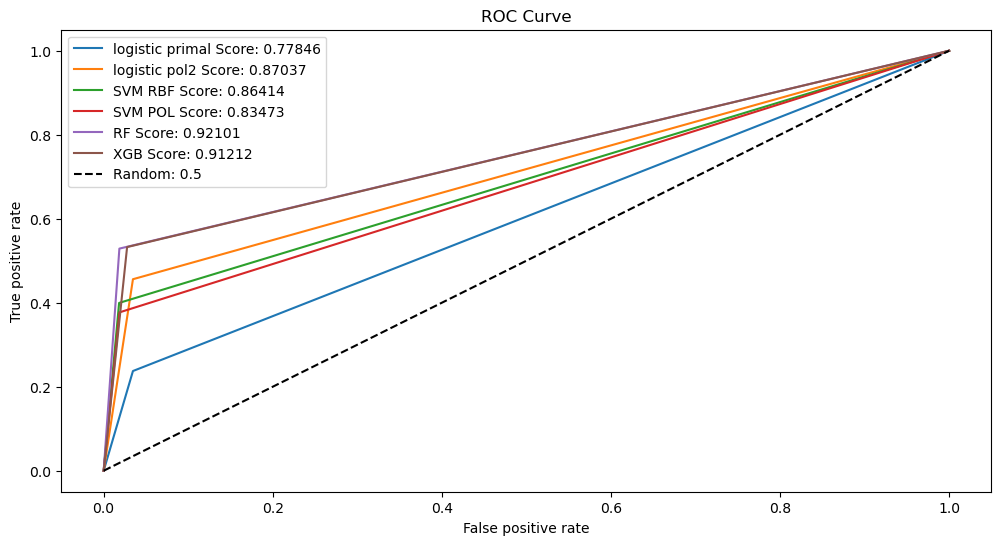

In [329]:
# Define models and their AUC scores
models = {
    'logistic primal': {'fpr': fpr_log_primal, 'tpr': tpr_log_primal, 'auc': auc_log_primal},
    'logistic pol2': {'fpr': fpr_log_pol2, 'tpr': tpr_log_pol2, 'auc': auc_log_pol2},
    'SVM RBF': {'fpr': fpr_SVM_RBF, 'tpr': tpr_SVM_RBF, 'auc': auc_SVM_RBF},
    'SVM POL': {'fpr': fpr_SVM_POL, 'tpr': tpr_SVM_POL, 'auc': auc_SVM_POL},
    'RF': {'fpr': fpr_RF, 'tpr': tpr_RF, 'auc': auc_RF},
    'XGB': {'fpr': fpr_XGB, 'tpr': tpr_XGB, 'auc': auc_XGB}
}

# Plot ROC curve for each model
plt.figure(figsize=(12, 6), linewidth=1)
for model, data in models.items():
    fpr = data['fpr']
    tpr = data['tpr']
    auc = data['auc']
    plt.plot(fpr, tpr, label=f'{model} Score: {auc:.5f}')

# Plot random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random: 0.5')

# Set axis labels and title
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')

# Add legend and display the plot
plt.legend(loc='best')
plt.show()

Based on the above finding, the primary project is to predict potential churn  customers and implement measures to prevent churn. Therefore, the accuracy of correctly identifying customers who may churn (recall on the positive cases) is more important than the overall accuracy score of the model.

Given that only 20% of the data represents churn cases, achieving a recall higher than this baseline would already be an improvement. However, our goal is to maximize the recall while maintaining a high precision. This way, the bank can efficiently allocate its resources towards the customers identified by the model without wasting too many resources on false positives.

Upon reviewing the fitted models, the random forest model stands out as it provides a reasonable balance between recall and precision. Based on the training set, this model has a precision score of 0.88 on churn cases, meaning that out of all the customers predicted to churn, 88% actually do. Additionally, it achieves a recall score of 0.53 on churn cases, successfully highlighting 53% of all customers who churned.

## 6. Test Model Prediction Accuracy on Test Data

In [325]:
# Make data transformation for test data
df_test = PrepPipeLine(df_test, df_train.columns, minVec, maxVec)
df_test = df_test.mask(np.isinf(df_test))
df_test = df_test.fillna(df_test.mean())
df_test.shape

C:\Users\quang\AppData\Local\Temp\ipykernel_16624\72760551.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict[i + '_' + str(j)] = np.where(df_predict[i] == j, 1, -1)
C:\Users\quang\AppData\Local\Temp\ipykernel_16624\72760551.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict[i + '_' + str(j)] = np.where(df_predict[i] == j, 1, -1)
C:\Users\quang\AppData\Local\Temp\ipykernel_16624\72760551.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

(2000, 17)

In [326]:
print(classification_report(df_test.Exited, log_primal.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1610
           1       0.62      0.24      0.34       390

    accuracy                           0.82      2000
   macro avg       0.73      0.60      0.62      2000
weighted avg       0.80      0.82      0.79      2000



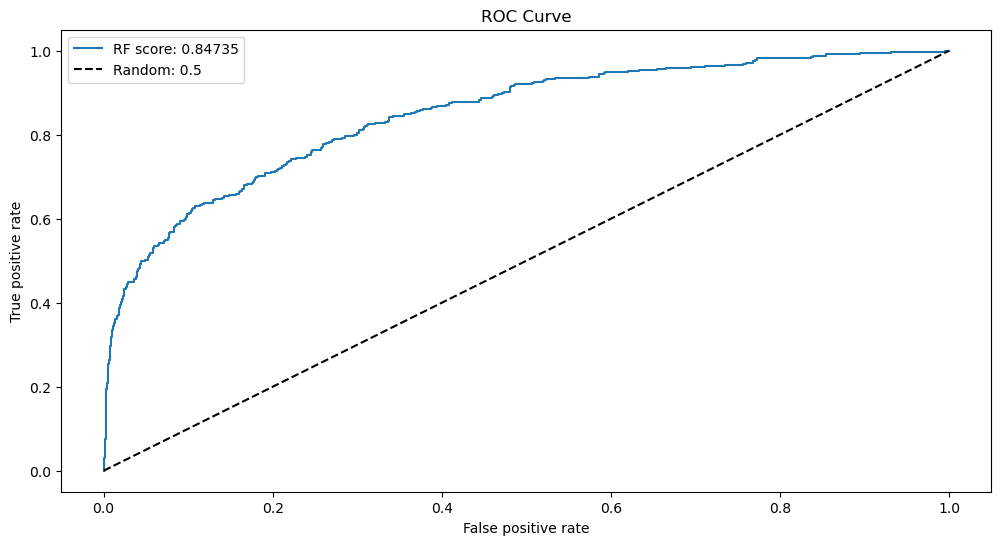

In [328]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities and labels for the test data
y_test = df_test['Exited']
y_pred_proba = RF.predict_proba(df_test.drop('Exited', axis=1))[:,1]

# Calculate AUC score
auc_RF_test = roc_auc_score(y_test, y_pred_proba)

# Calculate ROC curve
fpr_RF_test, tpr_RF_test, _ = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize = (12, 6), linewidth= 1)
plt.plot(fpr_RF_test, tpr_RF_test, label=f'RF score: {auc_RF_test:.5f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

## Conclusion

The model shows a slightly improved precision in predicting churned customers (label 1) when tested on unseen data. However, despite its overall high accuracy, the model still fails to identify approximately half of the customers who actually churn. To enhance its performance, it would be beneficial to continuously retrain the model using additional data over time. In the meantime, utilizing the current model can help save around 41% of customers who would have otherwise churned.